<a href="https://colab.research.google.com/github/rioanantas/rioanantas/blob/main/Rio%20Ananta%20Sitepu%20(Tugas%2011).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [862]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [863]:
cd/content/drive/MyDrive

/content/drive/MyDrive


In [864]:
ls

 19-03-2020-08.07.52.pdf
 20200428_082631.jpg
 3scene@
'76_1101194055_Rio Ananta Sitepu.docx'
'Annotation 2020-09-11 182120.png'
 Classroom/
 dataset@
'Dok baru 04-02-2020 21.16.07.pdf'
 EcertificateFreedomLearn_1101194055_KampusMerdeka.pdf
'Getting started.pdf'
'KSM RIO (1).pdf'
'KSM RIO.pdf'
 model_scene/
 python/
 Reed-blog-post-image-1024x1024.jpg
'Rio Ananta.jpg'
'Rio Ananta S_1101194055_107.pdf'
'Rio Ananta Sitepu_1101194055_107 (2).pdf'
'Rio Ananta Sitepu_1101194055_107.pdf'
'Screenshot_20201021-212741_Mobile Legends Bang Bang.jpg'
'Screenshot 2020-11-14 065241.png'
'SENIN(2)_TT01(G)_RIO ANANTA S_1101194055_JW.pdf'
'TT4301_Rio Ananta Sitepu_1.pdf'
'tugas kalkulus integral trigonometri.pdf'
'Tugas Kuis Rio Ananta Sitepu 1101194055 (1).pdf'
'Tugas Kuis Rio Ananta Sitepu 1101194055.pdf'
'Untitled folder'/
'WhatsApp Image 2020-10-08 at 21.44.59.jpeg'
'WhatsApp Image 2020-10-08 at 21.45.13.jpeg'
'WhatsApp Image 2020-10-08 at 21.45.56.jpeg'
'WhatsApp Image 2020-10-08 at 21.46.03.jpeg'

In [865]:
# import the necessary packages

from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense 
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths 
import numpy as np
import os

In [866]:
# grab all image paths in the input dataset directory, then initialize

# our list of images and corresponding class labels 
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [867]:
# loop over our input images

for imagePath in imagePaths:
  # load the input image from disk, resize it to 64x64 pixels, scale 
  # the pixel intensities to the range [0, 1], and then update our
  # images list
  image = Image.open(imagePath)
  #preprocessing
  image = np.array(image.resize((87, 87))) / 255.0
  data.append(image)

  # extract the class label from the file path and update the
  # labels list
  label = imagePath.split(os.path. sep)[-2] 
  labels.append(label)

In [868]:
print(labels)

['GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09',

In [869]:
# encode the labels, converting them from strings to integers 
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [870]:
print(labels)

[[0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [871]:
# perform a troining and testing split, using 75% of the data for 
# training and 25% for evaluation

(trainX, testX, trainY, testY) = train_test_split(np.array(data), np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(435, 87, 87, 3)
(146, 87, 87, 3)


In [872]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(87,87,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_92"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_90 (Conv2D)           (None, 85, 85, 8)         224       
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 42, 42, 8)         0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 40, 40, 16)        1168      
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 20, 20, 16)        0         
_________________________________________________________________
flatten_81 (Flatten)         (None, 6400)              0         
_________________________________________________________________
dense_78 (Dense)             (None, 100)               640100    
_________________________________________________________________
dense_79 (Dense)             (None, 5)               

In [879]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential (
    [
        Flatten(input_shape=(87*87*3,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(16, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(5, activation = "softmax", name="layer4"),
    ]
)

In [880]:
model.summary()

Model: "sequential_94"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_83 (Flatten)         (None, 22707)             0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               2270800   
_________________________________________________________________
layer2 (Dense)               (None, 16)                1616      
_________________________________________________________________
layer3 (Dense)               (None, 16)                272       
_________________________________________________________________
layer4 (Dense)               (None, 5)                 85        
Total params: 2,272,773
Trainable params: 2,272,773
Non-trainable params: 0
_________________________________________________________________


In [881]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [882]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
14/14 [==============================] - 2s 118ms/step - loss: 0.2032 - accuracy: 0.9356 - val_loss: 0.5524 - val_accuracy: 0.7740
Epoch 2/25
14/14 [==============================] - 2s 110ms/step - loss: 0.1045 - accuracy: 0.9770 - val_loss: 0.4281 - val_accuracy: 0.8356
Epoch 3/25
14/14 [==============================] - 2s 111ms/step - loss: 0.0716 - accuracy: 0.9954 - val_loss: 0.4452 - val_accuracy: 0.8356
Epoch 4/25
14/14 [==============================] - 2s 111ms/step - loss: 0.0632 - accuracy: 0.9862 - val_loss: 0.3996 - val_accuracy: 0.8151
Epoch 5/25
14/14 [==============================] - 2s 113ms/step - loss: 0.0479 - accuracy: 0.9977 - val_loss: 0.4205 - val_accuracy: 0.8151
Epoch 6/25
14/14 [==============================] - 2s 113ms/step - loss: 0.0493 - accuracy: 0.9954 - val_loss: 0.4414 - val_accuracy: 0.8288
Epoch 7/25
14/14 [==============================] - 2s 111ms/step - loss: 0.0362 - accuracy: 1.0000 - val_loss: 0.3765 - val_accuracy: 0.8356
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


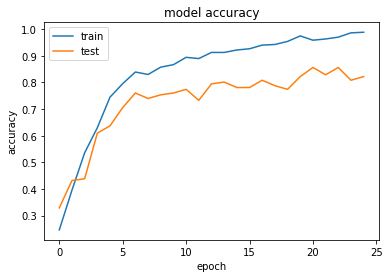

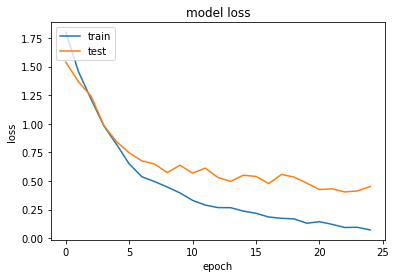

In [877]:
import matplotlib.pyplot as plt

print(H.history.keys()) 
# summarize history for accuracy
plt.plot(H.history['accuracy']) 
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss 
plt.plot(H.history['loss']) 
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [883]:
# evaluate the network
print("[INFO] evaluating network...") 
predictions = model.predict(testX, batch_size=32) 
print(classification_report(testY.argmax (axis=1),
  predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_08       0.10      0.27      0.14        22
      GMB_09       0.00      0.00      0.00        31
      GMB_10       0.00      0.00      0.00        28
      GMB_11       0.25      0.64      0.36        33
      nonGMB       0.00      0.00      0.00        32

    accuracy                           0.18       146
   macro avg       0.07      0.18      0.10       146
weighted avg       0.07      0.18      0.10       146



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model.save('model_scene')

In [ ]:
import cv2
import matplotlib.pyplot as plt
image1='Rio Ananta.jpg'

In [ ]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [ ]:
image_testing = Image.open ('Rio Ananta.jpg')
image_testing = np.array(image_testing.resize((87,87))) / 255.0
image_testing.shape

In [ ]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

In [ ]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])